In [1]:
import numpy,pandas,datetime
import matplotlib,matplotlib.pyplot
import scanpy
scanpy.settings.verbosity=5

# 1. Reading data

In [2]:
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

idata=scanpy.read_csv('/Volumes/omics4tb2/alomana/projects/mscni/data/scanpy/count.file.all.day.clean.csv')
adata=idata.transpose()
print(adata)
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

2019-03-24 17:22:31
AnnData object with n_obs × n_vars = 3477 × 22662 
2019-03-24 17:30:25


# 2. Preprocessing

    normalizing by total count per cell
        finished (0:00:03.35): normalized adata.X and added
        'n_counts', counts per cell before normalization (adata.obs)


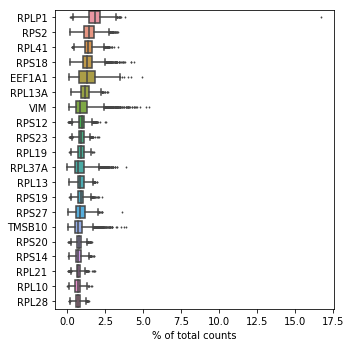

In [3]:
scanpy.pl.highest_expr_genes(adata,n_top=20)

In [4]:
scanpy.pp.filter_cells(adata,min_genes=200)
scanpy.pp.filter_genes(adata,min_cells=3)
print(adata)

filtered out 10557 genes that are detected in less than 3 cells
AnnData object with n_obs × n_vars = 3477 × 12105 
    obs: 'n_genes'
    var: 'n_cells'


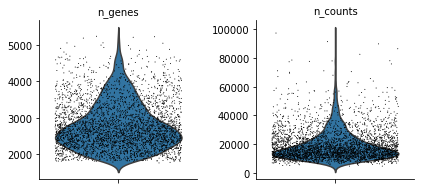

In [5]:
adata.obs['n_counts'] = adata.X.sum(axis=1)
scanpy.pl.violin(adata, ['n_genes', 'n_counts'],jitter=0.4, multi_panel=True)

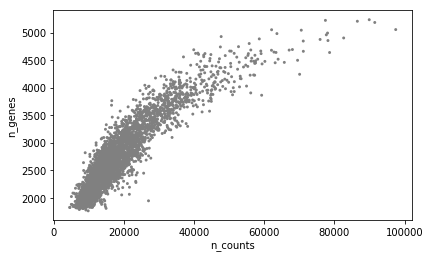

In [6]:
scanpy.pl.scatter(adata, x='n_counts', y='n_genes')

In [7]:
scanpy.pp.normalize_per_cell(adata, counts_per_cell_after=1e5)
scanpy.pp.log1p(adata)

    normalizing by total count per cell
        finished (0:00:01.01): normalized adata.X and added
        'n_counts', counts per cell before normalization (adata.obs)


In [8]:
adata.raw = adata

    extracting highly variable genes
        finished (0:00:01.62)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


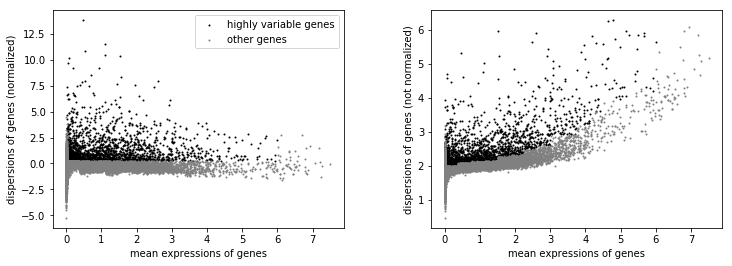

View of AnnData object with n_obs × n_vars = 3477 × 2851 
    obs: 'n_genes', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'


In [9]:
#scanpy.pp.highly_variable_genes(adata,min_mean=0.0125,max_mean=5.5,min_disp=0.75) # 1,273
#scanpy.pp.highly_variable_genes(adata,min_mean=0.01,max_mean=6,min_disp=0.5) # 1,889
scanpy.pp.highly_variable_genes(adata,min_mean=0.0125,max_mean=6,min_disp=0.25) # 2,851
#scanpy.pp.highly_variable_genes(adata,min_mean=0,max_mean=8,min_disp=-5) # 12,104
scanpy.pl.highly_variable_genes(adata)
adata = adata[:, adata.var['highly_variable']]
print(adata)

In [10]:
adata = adata[:, adata.var['highly_variable']]
print(adata)

View of AnnData object with n_obs × n_vars = 3477 × 2851 
    obs: 'n_genes', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'


In [11]:
scanpy.pp.regress_out(adata, ['n_counts'])
scanpy.pp.scale(adata, max_value=10)
print(adata)

regressing out ['n_counts']
    finished (0:00:16.47)
    ... clipping at max_value 10
AnnData object with n_obs × n_vars = 3477 × 2851 
    obs: 'n_genes', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'


# 3. Visualization

In [12]:
cellIDs=adata.obs_names.tolist()

dayLabels=[]; uDayLabels=[]
for cellID in cellIDs:
    broken=cellID.split('_M397.')
    dayLabel=broken[1]
    dayLabels.append(dayLabel)
    if dayLabel not in uDayLabels:
        uDayLabels.append(dayLabel) 
print(uDayLabels)
adata.obs['dayLabel']=dayLabels

['control', 'day3', 'day6', 'day13', 'day17', 'day24']


## 3.1. PCA

In [13]:
scanpy.tl.pca(adata, svd_solver='arpack')

    computing PCA with n_comps = 50
        finished (0:00:01.72)     and added
    'X_pca', the PCA coordinates (adata.obs)
    'PC1', 'PC2', ..., the loadings (adata.var)
    'pca_variance', the variance / eigenvalues (adata.uns)
    'pca_variance_ratio', the variance ratio (adata.uns)


... storing 'dayLabel' as categorical


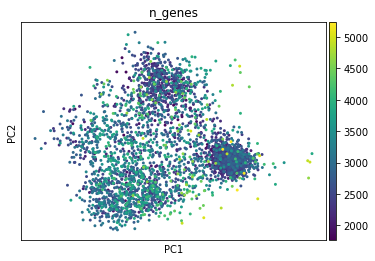

In [14]:
scanpy.pl.pca(adata, color='n_genes')

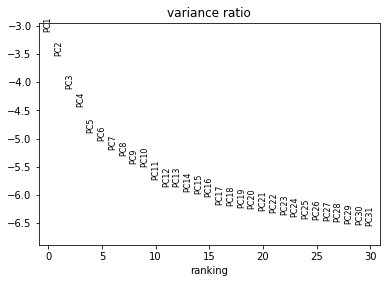

In [15]:
scanpy.pl.pca_variance_ratio(adata, log=True)

In [16]:
#adata.write(resultsFile)
print(adata)

AnnData object with n_obs × n_vars = 3477 × 2851 
    obs: 'n_genes', 'n_counts', 'dayLabel'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'


## 3.2. UMAP

In [17]:
scanpy.pp.neighbors(adata, n_neighbors=10, n_pcs=50)

computing neighbors
    using 'X_pca' with n_pcs = 50
    computed neighbors (0:00:00.42)
    computed connectivities (0:00:06.64)
    finished (0:00:00.00) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [18]:
scanpy.tl.umap(adata)

computing UMAP
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
    finished (0:00:09.12) --> added
    'X_umap', UMAP coordinates (adata.obsm)


In [19]:
scanpy.tl.tsne(adata)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3477 samples in 0.008s...
[t-SNE] Computed neighbors for 3477 samples in 1.133s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3477
[t-SNE] Computed conditional probabilities for sample 2000 / 3477
[t-SNE] Computed conditional probabilities for sample 3000 / 3477
[t-SNE] Computed conditional probabilities for sample 3477 / 3477
[t-SNE] Mean sigma: 4.479245
[t-SNE] Computed conditional probabilities in 0.217s
[t-SNE] Iteration 50: error = 84.5795288, gradient norm = 0.1898731 (50 iterations in 3.286s)
[t-SNE] Iteration 100: error = 84.5717545, gradient norm = 0.1792066 (50 iterations in 3.472s)
[t-SNE] Iteration 150: error = 84.9318008, gradient norm = 0.1764066 (50 iterations in 4.034s)
[t-SNE] Iteration 200: error = 85.1443100, gradient norm = 0.1797931 (50 iterations in 3.308s)
[t-SNE] Iteration 250: erro

In [20]:
scanpy.tl.louvain(adata)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.33) --> found 11 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


## Potting

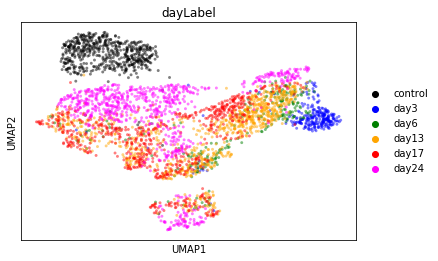

In [21]:
scanpy.pl.umap(adata, color=['dayLabel'],palette=['black','blue','green','orange','red','magenta'],alpha=0.5,)

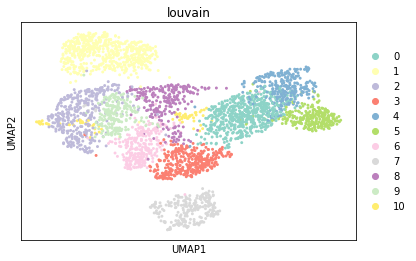

In [22]:
scanpy.pl.umap(adata, color=['louvain'],palette='Set3')

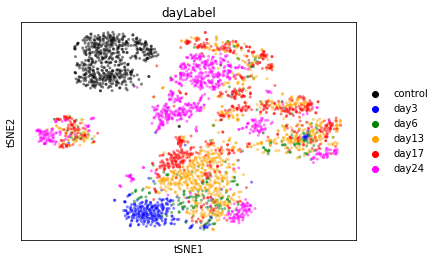

In [23]:
scanpy.pl.tsne(adata, color=['dayLabel'],palette=['black','blue','green','orange','red','magenta'],alpha=0.5,)

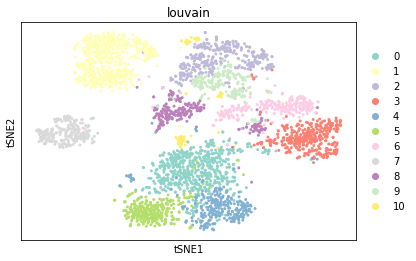

In [24]:
scanpy.pl.tsne(adata, color=['louvain'],palette='Set3')

control ['control'] 572


ValueError: RGBA values should be within 0-1 range

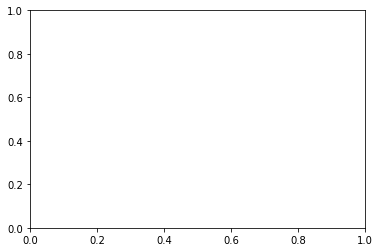

In [25]:
dayColors=['grey','blue','green','orange','red','magenta']
positions=adata.obsm['X_umap']
accumulatedDays=[]
for dayLabel in uDayLabels:
    
    accumulatedDays.append(dayLabel)
    tag='.'.join(accumulatedDays)
    
    xpos=[]; ypos=[]; myColors=[]
    for i in range(len(adata.obs['dayLabel'])):
        if adata.obs['dayLabel'][i] in accumulatedDays:
            xpos.append(positions[i,0])
            ypos.append(positions[i,1])
            #myColors.append(dayColors[accumulatedDays.index(adata.obs['dayLabel'][i])])
            myColors.append(adata.obs['louvain'][i])
    
    print(tag,accumulatedDays,len(xpos))
    matplotlib.pyplot.scatter(xpos,ypos,color=myColors,alpha=1/3,edgecolors='none')
    
    matplotlib.pyplot.xlim([-7.5,10])
    matplotlib.pyplot.ylim([-10,7])
    #matplotlib.pyplot.xlabel('umap1')
    #matplotlib.pyplot.ylabel('umap2')
    matplotlib.pyplot.xticks([])
    matplotlib.pyplot.yticks([])
    #matplotlib.pyplot.grid(color='k', linestyle=':', linewidth=1,alpha=1/3,zorder=0)
    
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.savefig('figures.perDay.genes/{}.pdf'.format(tag))
    matplotlib.pyplot.clf()

## Highlighted by day and Louvain membership

In [ ]:
LouvainColors=adata.uns['louvain_colors']
LouvainMemberships=adata.obs['louvain'].tolist()
positions=adata.obsm['X_umap']
accumulatedDays=[]

for dayLabel in uDayLabels:
    
    accumulatedDays.append(dayLabel)
    tag='.'.join(accumulatedDays)
    
    xpos=[]; ypos=[]; myColors=[]
    for i in range(len(adata.obs['dayLabel'])):
        if adata.obs['dayLabel'][i] in accumulatedDays:
            xpos.append(positions[i,0])
            ypos.append(positions[i,1])
            myColors.append(LouvainColors[int(LouvainMemberships[i])])
    
    print(tag,accumulatedDays,len(xpos))
    matplotlib.pyplot.scatter(xpos,ypos,color=myColors,alpha=3/4,edgecolors='none')
    
    matplotlib.pyplot.xlim([-7.5,10])
    matplotlib.pyplot.ylim([-10,7])
    #matplotlib.pyplot.xlabel('umap1')
    #matplotlib.pyplot.ylabel('umap2')
    matplotlib.pyplot.xticks([])
    matplotlib.pyplot.yticks([])
    #matplotlib.pyplot.grid(color='k', linestyle=':', linewidth=1,alpha=1/3,zorder=0)
    
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.savefig('figures.perDay.genes/{}.perDay.LouvainMemberships.pdf'.format(tag))
    matplotlib.pyplot.clf()

In [ ]:
adata

In [ ]:
adata.write(resultsFile)

# 4. Marker genes

In [ ]:
scanpy.tl.rank_genes_groups(adata, 'louvain', method='t-test')
scanpy.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
pandas.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

In [ ]:
scanpy.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon')
scanpy.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
print(pandas.DataFrame(adata.uns['rank_genes_groups']['names']).head(5))
adata.write(resultsFile)

In [ ]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pandas.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

In [ ]:
scanpy.tl.rank_genes_groups(adata, 'louvain', groups=['0'], reference='1', method='wilcoxon')
scanpy.pl.rank_genes_groups(adata, groups=['0'], n_genes =20)

In [ ]:
scanpy.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

In [ ]:
adata = scanpy.read(resultsFile)
scanpy.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

In [ ]:
scanpy.pl.violin(adata, ['RPS4X', 'SOX10', 'TYMS'], groupby='louvain')

In [ ]:
markerGenes=['RPS4X','SOX10','TYMS','SPARC','RPL31','UQCRB','S100A4','TPM1','RPL37A','ATAD2','CDKN3']
ax = scanpy.pl.dotplot(adata, markerGenes, groupby='louvain')

In [ ]:
ax = scanpy.pl.stacked_violin(adata, markerGenes, groupby='louvain', rotation=90)

In [ ]:
print(adata)

In [ ]:
adata.write_csvs(resultsFile[:-5],skip_data=False)